<a href="https://colab.research.google.com/github/neetagt/Data-Analysis-with-Python/blob/main/ReadingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
with open('/content/btc-market-price.csv','r') as file:
  print(file)

<_io.TextIOWrapper name='/content/btc-market-price.csv' mode='r' encoding='utf-8'>


In [4]:
with open('/content/btc-market-price.csv','r') as file:
  for index, line in enumerate(file.readlines()):
    if(index<10):
      print(index,line)

0 2017-04-02 00:00:00,1099.169125

1 2017-04-03 00:00:00,1141.813

2 2017-04-04 00:00:00,1141.6003625

3 2017-04-05 00:00:00,1133.0793142857142

4 2017-04-06 00:00:00,1196.3079375

5 2017-04-07 00:00:00,1190.45425

6 2017-04-08 00:00:00,1181.1498375

7 2017-04-09 00:00:00,1208.8005

8 2017-04-10 00:00:00,1207.744875

9 2017-04-11 00:00:00,1226.6170375



In [5]:
with open('/content/btc-market-price.csv','r') as file:
  for index, line in enumerate(file.readlines()):
    if(index<10):
      timestamp, price = line.split(',')
      print(f'{timestamp}: ${price}')

2017-04-02 00:00:00: $1099.169125

2017-04-03 00:00:00: $1141.813

2017-04-04 00:00:00: $1141.6003625

2017-04-05 00:00:00: $1133.0793142857142

2017-04-06 00:00:00: $1196.3079375

2017-04-07 00:00:00: $1190.45425

2017-04-08 00:00:00: $1181.1498375

2017-04-09 00:00:00: $1208.8005

2017-04-10 00:00:00: $1207.744875

2017-04-11 00:00:00: $1226.6170375



In [9]:
import csv
with open('/content/btc-market-price.csv','r') as file:
  reader = csv.reader(file,delimiter=',')
  next(reader)
  for index, values in enumerate(reader):
    if not values:
      continue
    timestamp, price = values
    print(f'{timestamp}: ${price}')

2017-04-03 00:00:00: $1141.813
2017-04-04 00:00:00: $1141.6003625
2017-04-05 00:00:00: $1133.0793142857142
2017-04-06 00:00:00: $1196.3079375
2017-04-07 00:00:00: $1190.45425
2017-04-08 00:00:00: $1181.1498375
2017-04-09 00:00:00: $1208.8005
2017-04-10 00:00:00: $1207.744875
2017-04-11 00:00:00: $1226.6170375
2017-04-12 00:00:00: $1218.92205
2017-04-13 00:00:00: $1180.0237125
2017-04-14 00:00:00: $1185.2600571428572
2017-04-15 00:00:00: $1184.8806714285713
2017-04-16 00:00:00: $1186.9274125
2017-04-17 00:00:00: $1205.634875
2017-04-18 00:00:00: $1216.1867428571427
2017-04-19 00:00:00: $1217.9300875
2017-04-20 00:00:00: $1241.6863250000001
2017-04-21 00:00:00: $1258.3614125
2017-04-22 00:00:00: $1261.311225
2017-04-23 00:00:00: $1257.9881125
2017-04-24 00:00:00: $1262.902775
2017-04-25 00:00:00: $1279.4146875000001
2017-04-26 00:00:00: $1309.109875
2017-04-27 00:00:00: $1345.3539125
2017-04-28 00:00:00: $1331.2944285714286
2017-04-29 00:00:00: $1334.9790375
2017-04-30 00:00:00: $1353.00

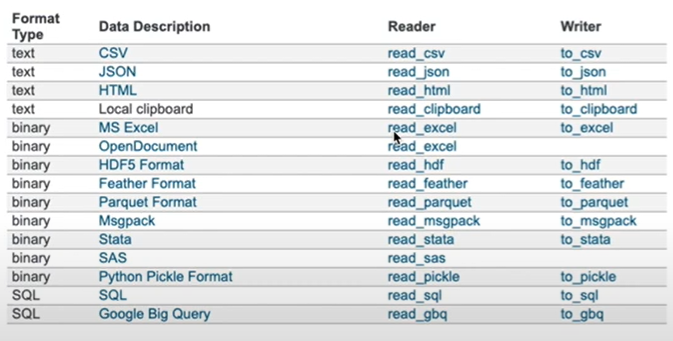

In [12]:
csv_url = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv"

In [13]:
pd.read_csv(csv_url).head()

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,2000,3.521418e+09
1,Afghanistan,AFG,2001,2.813572e+09
2,Afghanistan,AFG,2002,3.825701e+09
3,Afghanistan,AFG,2003,4.520947e+09
4,Afghanistan,AFG,2004,5.224897e+09


In [14]:
pd.read_csv(csv_url,header=None)

,0,1,2,3
0,Country Name,Country Code,Year,Value
1,Afghanistan,AFG,2000,3521418059.923445
2,Afghanistan,AFG,2001,2813571753.8725324
3,Afghanistan,AFG,2002,3825701438.9996333
4,Afghanistan,AFG,2003,4520946818.545814
...,...,...,...,...
13975,Zimbabwe,ZWE,2019,21832234925.50214
13976,Zimbabwe,ZWE,2020,21509698406.111595
13977,Zimbabwe,ZWE,2021,28371238665.511635
13978,Zimbabwe,ZWE,2022,27366627153.095413


In [16]:
import sqlite3

In [ ]:
conn = sqlite3.connect("chinook.db")

In [ ]:
cur = conn.cursor()

In [ ]:
cur.execute("SELECT * FROM employees LIMIT 5;")

In [ ]:
results = cur.fetchall()
results

In [ ]:
df = pd.DataFrame(results)

In [ ]:
cur.close()
conn.close()

In [ ]:
conn = sqlite3.connect("chinook.db")
df = pd.read_sql("SELECT * FROM employees;", conn)
df.head()

In [ ]:
df = pd.read_sql("SELECT * FROM employees;", conn,
                 index_col='EmployeeId',
                 parse_dates = ['BirthDate', 'HireDate'])
df.head()

In [ ]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///chinook.db")
connection = engine.connect()
df = pd.read_sql_table("employees", con=connection)
df.head()
connection.close()

In [ ]:
#Create tables from dataframe objects
df.to_sql? #to check if the table in the database already exists
cur = conn.cursor()
cur.execute("DROP TABLE IF EXISTS employees2;")
cur.close()
df.to_sql("employees2", conn)
pd.read_sql_query("SELECT * FROM employees2;", conn).head()

In [17]:
#Reading HTML tables
!pip install lxml

In [21]:
html_string = """<!DOCTYPE html>
<html>
<body>

<table>
  <tr>
    <th>Company</th>
    <th>Contact</th>
    <th>Country</th>
  </tr>
  <tr>
    <td>Alfreds Futterkiste</td>
    <td>Maria Anders</td>
    <td>Germany</td>
  </tr>
  <tr>
    <td>Centro comercial Moctezuma</td>
    <td>Francisco Chang</td>
    <td>Mexico</td>
  </tr>
</table>
</body>
</html>

"""

In [22]:
from IPython.core.display import display,HTML
display(HTML(html_string))

Company,Contact,Country
Alfreds Futterkiste,Maria Anders,Germany
Centro comercial Moctezuma,Francisco Chang,Mexico


In [25]:
dfs = pd.read_html(html_string)
len(dfs)

/tmp/ipython-input-1315155447.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(html_string)


1

In [26]:
dfs

[                      Company          Contact  Country
 0         Alfreds Futterkiste     Maria Anders  Germany
 1  Centro comercial Moctezuma  Francisco Chang   Mexico]

In [27]:
df = dfs[0]

In [28]:
df

,Company,Contact,Country
0,Alfreds Futterkiste,Maria Anders,Germany
1,Centro comercial Moctezuma,Francisco Chang,Mexico


In [29]:
html_url = "https://www.basketball-reference.com/leagues/NBA_2019_per_game.html"

In [31]:
nb_tables = pd.read_html(html_url)

In [32]:
len(nb_tables)

2

In [33]:
nbatables = nb_tables[0]

In [34]:
nbatables.head()

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,James Harden,29.0,HOU,PG,78.0,78.0,36.8,10.8,24.5,...,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,"MVP-2,AS,NBA1"
1,2.0,Paul George,28.0,OKC,SF,77.0,77.0,36.9,9.2,21.0,...,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0,"MVP-3,DPOY-3,AS,NBA1,DEF1"
2,3.0,Giannis Antetokounmpo,24.0,MIL,PF,72.0,72.0,32.8,10.0,17.3,...,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,"MVP-1,DPOY-2,AS,NBA1,DEF1"
3,4.0,Joel Embiid,24.0,PHI,C,64.0,64.0,33.7,9.1,18.7,...,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5,"MVP-7,DPOY-4,AS,NBA2,DEF2"
4,5.0,LeBron James,34.0,LAL,SF,55.0,55.0,35.2,10.1,19.9,...,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4,"MVP-11,AS,NBA3"


In [35]:
import requests

In [36]:
html_url = "https://en.wikipedia.org/wiki/The_Simpsons"

In [38]:
r = requests.get(html_url)
wiki_tables = pd.read_html(r.text,header=0)
len(wiki_tables)

/tmp/ipython-input-2012861251.py:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  wiki_tables = pd.read_html(r.text,header=0)


49

In [39]:
wiki_tables

[            The Simpsons                                     The Simpsons.1
 0                    NaN                                                NaN
 1                  Genre                             Animated sitcom Satire
 2             Created by                                      Matt Groening
 3           Developed by            James L. Brooks Matt Groening Sam Simon
 4            Showrunners  James L. Brooks Matt Groening Sam Simon Al Jea...
 5             Written by                                    List of writers
 6            Directed by                                  List of directors
 7              Voices of  Dan Castellaneta Julie Kavner Nancy Cartwright...
 8   Theme music composer                                       Danny Elfman
 9          Opening theme                               "The Simpsons Theme"
 10          Ending theme                     "The Simpsons Theme" (reprise)
 11             Composers   Richard Gibbs Alf Clausen Bleeding Fingers Music

In [47]:
simpsons = wiki_tables[2]  #Second table on the wikipedia page

In [48]:
simpsons

,Season,Season.1,No. of episodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
0,Season,Season,No. of episodes,Season premiere,Season finale,Time slot (ET),Avg. households / viewers (in millions),Most watched episode,Most watched episode
1,Season,Season,No. of episodes,Season premiere,Season finale,Time slot (ET),Avg. households / viewers (in millions),Viewers (millions),Episode title
2,1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 pm,13.4m h.[n1][175],33.5[176],"""Life on the Fast Lane"""
3,2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 pm,12.2m h.[n1][n2],33.6[177],"""Bart Gets an 'F'"""
4,3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 pm,12m h.[n1][n3],25.5[178],"""Colonel Homer"""
5,4,1992–93,22,"September 24, 1992","May 13, 1993",Thursday 8:00 pm,12.1m h.[n1][179],28.6[180],"""Lisa's First Word"""
6,5,1993–94,22,"September 30, 1993","May 19, 1994",Thursday 8:00 pm,10.5m h.[n1][n4],24.0[181],"""Treehouse of Horror IV"""
7,6,1994–95,25,"September 4, 1994","May 21, 1995",Sunday 8:00 pm,9m h.[n1][182],22.2[183],"""Treehouse of Horror V"""
8,7,1995–96,25,"September 17, 1995","May 19, 1996",Sunday 8:00 pm (Episodes 1–24) Sunday 8:30 pm ...,8m h.[n1][184],22.6[185],"""Who Shot Mr. Burns? – Part II"""
9,8,1996–97,25,"October 27, 1996","May 18, 1997",Sunday 8:30 pm (Episodes 1–3) Sunday 8:00 pm (...,8.6m h.[187],20.41[188],"""The Springfield Files"""


In [49]:
simpsons.drop([0,1],inplace=True)

In [50]:
simpsons

,Season,Season.1,No. of episodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
2,1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 pm,13.4m h.[n1][175],33.5[176],"""Life on the Fast Lane"""
3,2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 pm,12.2m h.[n1][n2],33.6[177],"""Bart Gets an 'F'"""
4,3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 pm,12m h.[n1][n3],25.5[178],"""Colonel Homer"""
5,4,1992–93,22,"September 24, 1992","May 13, 1993",Thursday 8:00 pm,12.1m h.[n1][179],28.6[180],"""Lisa's First Word"""
6,5,1993–94,22,"September 30, 1993","May 19, 1994",Thursday 8:00 pm,10.5m h.[n1][n4],24.0[181],"""Treehouse of Horror IV"""
7,6,1994–95,25,"September 4, 1994","May 21, 1995",Sunday 8:00 pm,9m h.[n1][182],22.2[183],"""Treehouse of Horror V"""
8,7,1995–96,25,"September 17, 1995","May 19, 1996",Sunday 8:00 pm (Episodes 1–24) Sunday 8:30 pm ...,8m h.[n1][184],22.6[185],"""Who Shot Mr. Burns? – Part II"""
9,8,1996–97,25,"October 27, 1996","May 18, 1997",Sunday 8:30 pm (Episodes 1–3) Sunday 8:00 pm (...,8.6m h.[187],20.41[188],"""The Springfield Files"""
10,9,1997–98,25,"September 21, 1997","May 17, 1998",Sunday 8:00 pm,9.1m h.[189],19.80[190],"""The Two Mrs. Nahasapeemapetilons"""
11,10,1998–99,23,"August 23, 1998","May 16, 1999",Sunday 8:00 pm,7.9m h.[191],19.11[192],"""Sunday, Cruddy Sunday"""


In [51]:
simpsons.set_index('Season',inplace=True)

In [52]:
simpsons.head()

,Season.1,No. of episodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
Season,,,,,,,,
1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 pm,13.4m h.[n1][175],33.5[176],"""Life on the Fast Lane"""
2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 pm,12.2m h.[n1][n2],33.6[177],"""Bart Gets an 'F'"""
3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 pm,12m h.[n1][n3],25.5[178],"""Colonel Homer"""
4,1992–93,22,"September 24, 1992","May 13, 1993",Thursday 8:00 pm,12.1m h.[n1][179],28.6[180],"""Lisa's First Word"""
5,1993–94,22,"September 30, 1993","May 19, 1994",Thursday 8:00 pm,10.5m h.[n1][n4],24.0[181],"""Treehouse of Horror IV"""


In [53]:
#Which season has the lowest number of episodes?
simpsons['No. of episodes'].unique()

array(['13', '22', '24', '25', '23', '21', '20', '18', nan], dtype=object)

In [54]:
simpsons = simpsons.loc[simpsons['No. of episodes']!='TBA']

In [56]:
simpsons

,Season.1,No. of episodes,Originally aired,Originally aired.1,Originally aired.2,Viewership,Viewership.1,Viewership.2
Season,,,,,,,,
1,1989–90,13,"December 17, 1989","May 13, 1990",Sunday 8:30 pm,13.4m h.[n1][175],33.5[176],"""Life on the Fast Lane"""
2,1990–91,22,"October 11, 1990","July 11, 1991",Thursday 8:00 pm,12.2m h.[n1][n2],33.6[177],"""Bart Gets an 'F'"""
3,1991–92,24,"September 19, 1991","August 27, 1992",Thursday 8:00 pm,12m h.[n1][n3],25.5[178],"""Colonel Homer"""
4,1992–93,22,"September 24, 1992","May 13, 1993",Thursday 8:00 pm,12.1m h.[n1][179],28.6[180],"""Lisa's First Word"""
5,1993–94,22,"September 30, 1993","May 19, 1994",Thursday 8:00 pm,10.5m h.[n1][n4],24.0[181],"""Treehouse of Horror IV"""
6,1994–95,25,"September 4, 1994","May 21, 1995",Sunday 8:00 pm,9m h.[n1][182],22.2[183],"""Treehouse of Horror V"""
7,1995–96,25,"September 17, 1995","May 19, 1996",Sunday 8:00 pm (Episodes 1–24) Sunday 8:30 pm ...,8m h.[n1][184],22.6[185],"""Who Shot Mr. Burns? – Part II"""
8,1996–97,25,"October 27, 1996","May 18, 1997",Sunday 8:30 pm (Episodes 1–3) Sunday 8:00 pm (...,8.6m h.[187],20.41[188],"""The Springfield Files"""
9,1997–98,25,"September 21, 1997","May 17, 1998",Sunday 8:00 pm,9.1m h.[189],19.80[190],"""The Two Mrs. Nahasapeemapetilons"""
